# Safas tracking criteria test

This notebook demonstrates the use of the sobel_focus filter from safas/filters. A key component of safas is the pre-defined object filters. 

## Import modules and data

Import safas  and other components for display and analysis. safas has several example images in the safas/data directory. These images are accessible as attributes of the data module because the __init__ function of safas/data also acts as a loader.   

In [2]:
import sys
from matplotlib import pyplot as plt

%matplotlib inline

import cv2

from safas import filters
from safas import data
from safas.filters.sobel_focus import imfilter
from safas.filters.imfilters_module import add_contours

## Process sample flocs image with threshold and sobel-based filter

Multiple steps are often requires to extract the object of interest from the image. A good introduction to image segmentation may be read in the [sci-kit image](https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html) or [OpenCV](https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html) documentation.

distances: [ 282.15980876   30.67515305 1037.93606284  658.13175169]
areas: [5484    8 5103 4602]
total error: [3.32485989e+07 1.49576746e+03 3.77110957e+07 2.76689860e+07]
try to match
index in match: 1
error is: 1495.7674637319956
err thresh is: 50000
error index: 1495.7674637319956
in match, obj0 is: 1
obj0 is: 1


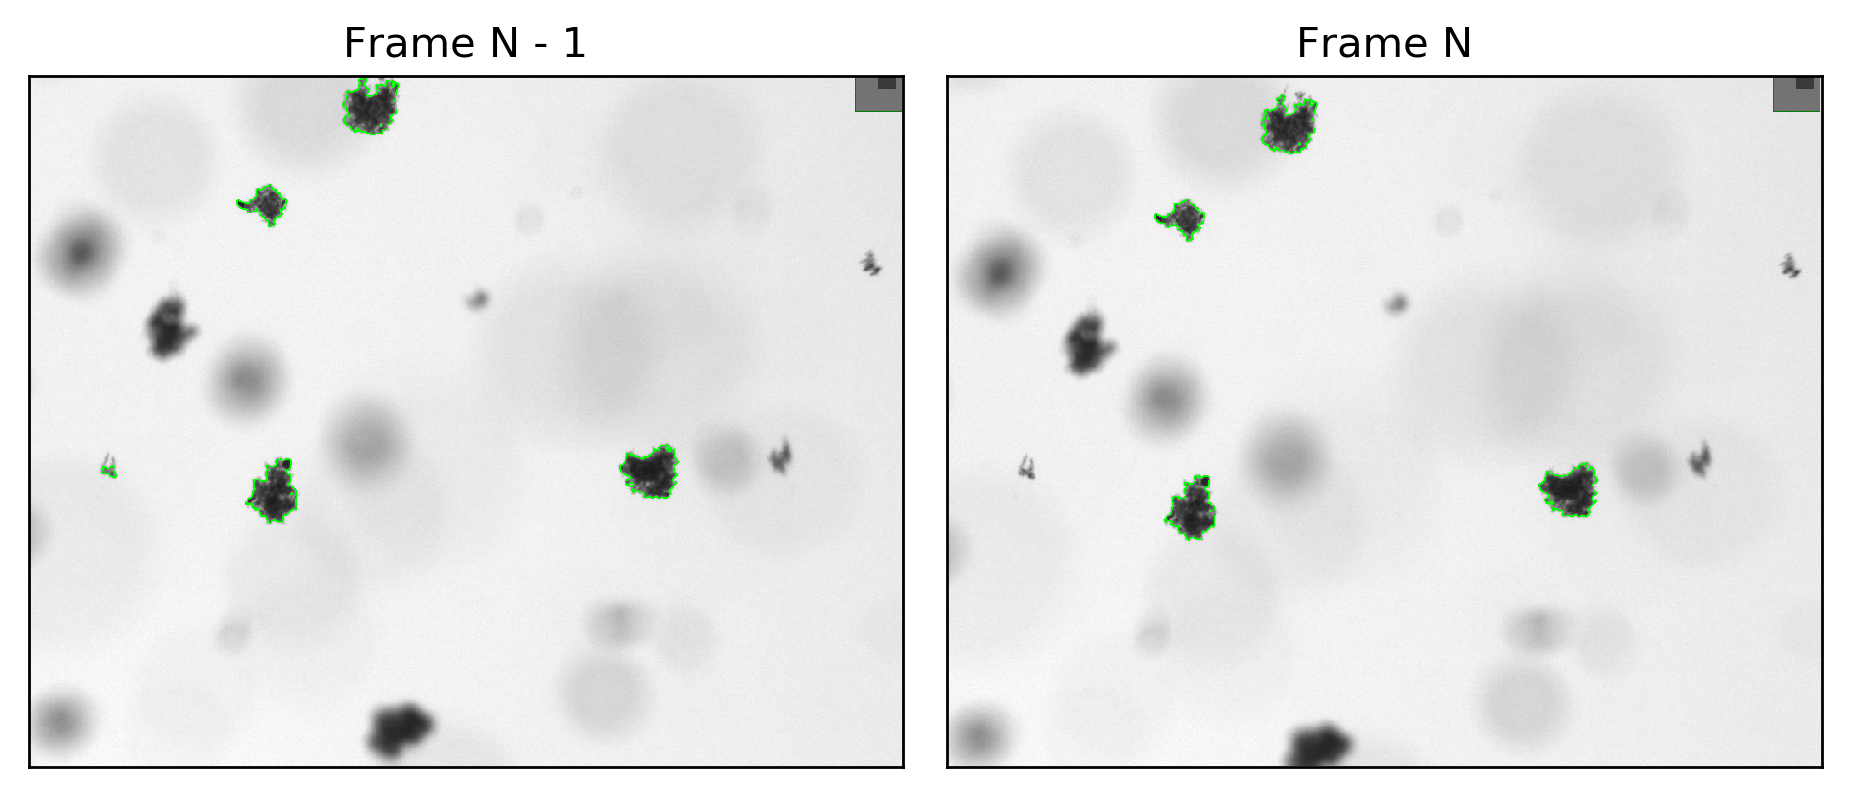

In [4]:
# 
import sys
sys.path.append(r'C:\Users\Ryan\Desktop\src\safas-dev')
from glob import glob
from skimage.measure import regionprops
from safas.filters.sobel_focus import imfilter
from safas.matcher import Matcher

files = glob('data/trackex/*.png')

# apply sobel-based gradient to segment the image 
params = {'img_thresh': 160,
          'edge_thresh': 150,
          'edge_distance': 1,
          'focus_filter': True,
          'clearborder_filter': True,
          'contour_color': (0,255,0),}

t0, imgt0 = imfilter.imfilter(src=cv2.imread(files[0]), **params)
t1, imgt1 = imfilter.imfilter(src=cv2.imread(files[1]), **params)

p0 = regionprops(t0)[1]
props = regionprops(t1)
criteria = {'error_threshold': 50000,
            'distance': 1,
            'area': 1,
            'squared': True,
           }

M = Matcher(p0=p0, props=props, criteria=criteria)
M.rank_and_match()

f, ax  = plt.subplots(1,2, dpi=250, figsize=(7.5, 3.5))
ax = ax.ravel()
for a in ax: 
    a.set_xticks([])
    a.set_yticks([])
    
ax[0].imshow(imgt0)
ax[0].set_title('Frame N - 1')
ax[1].imshow(imgt1)
ax[1].set_title('Frame N')

plt.tight_layout()

save = True

if save: 
    plt.savefig('png/track_ex.png', dpi=900)